<a href="https://colab.research.google.com/github/arsan13/data-science/blob/main/LinearRegression_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Car Dataset - Linear Regression**

In [ ]:
!git clone https://github.com/plotly/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 3103, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 3103 (delta 21), reused 178 (delta 17), pack-reused 2913
Receiving objects: 100% (3103/3103), 351.03 MiB | 20.16 MiB/s, done.
Resolving deltas: 100% (373/373), done.
Checking out files: 100% (1083/1083), done.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### **Data Collection**

In [ ]:
df = pd.read_csv('/content/datasets/imports-85.csv')

### **Data Analysis**

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [ ]:
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num-of-cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94


### **Data Wrangling**

In [ ]:
df = df.drop('make', axis=1)
# Drop columns due to low variance filter
df = df.drop(columns=['fuel-type', 'normalized-losses', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'fuel-system', 'engine-location', 'engine-type'], axis=1)

In [ ]:
df.isnull().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False)

In [ ]:
# Display records with 'NAN' records
df[df.isnull().any(axis=1)]

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,99.5,178.2,67.9,52.0,3053,5,131,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,94.5,155.9,63.6,52.0,1874,4,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,94.5,155.9,63.6,52.0,1909,4,90,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
55,3,95.3,169.0,65.7,49.6,2380,2,70,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,95.3,169.0,65.7,49.6,2380,2,70,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,95.3,169.0,65.7,49.6,2385,2,70,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,95.3,169.0,65.7,49.6,2500,2,80,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0
129,1,98.4,175.7,72.3,50.5,3366,8,203,3.94,3.11,10.0,288.0,5750.0,17,28,NaN
130,0,96.1,181.5,66.5,55.2,2579,4,132,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
131,2,96.1,176.8,66.6,50.5,2460,4,132,3.46,3.90,8.7,NaN,NaN,23,31,9895.0


In [ ]:
df = df.replace('?', np.nan)

In [ ]:
# Fill up nan values with median values of the respective columns
df['price'] = df['price'].fillna(df['price'].median()) 
df['bore'] = df['bore'].fillna(df['bore'].median()) 
df['stroke'] = df['stroke'].fillna(df['stroke'].median()) 
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].median()) 
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median()) 

In [ ]:
df.isnull().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

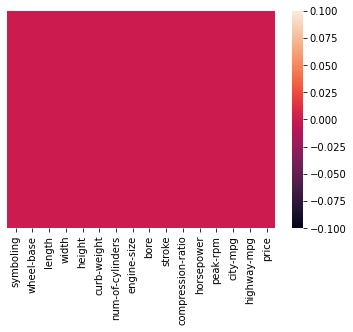

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num-of-cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17


In [ ]:
df.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


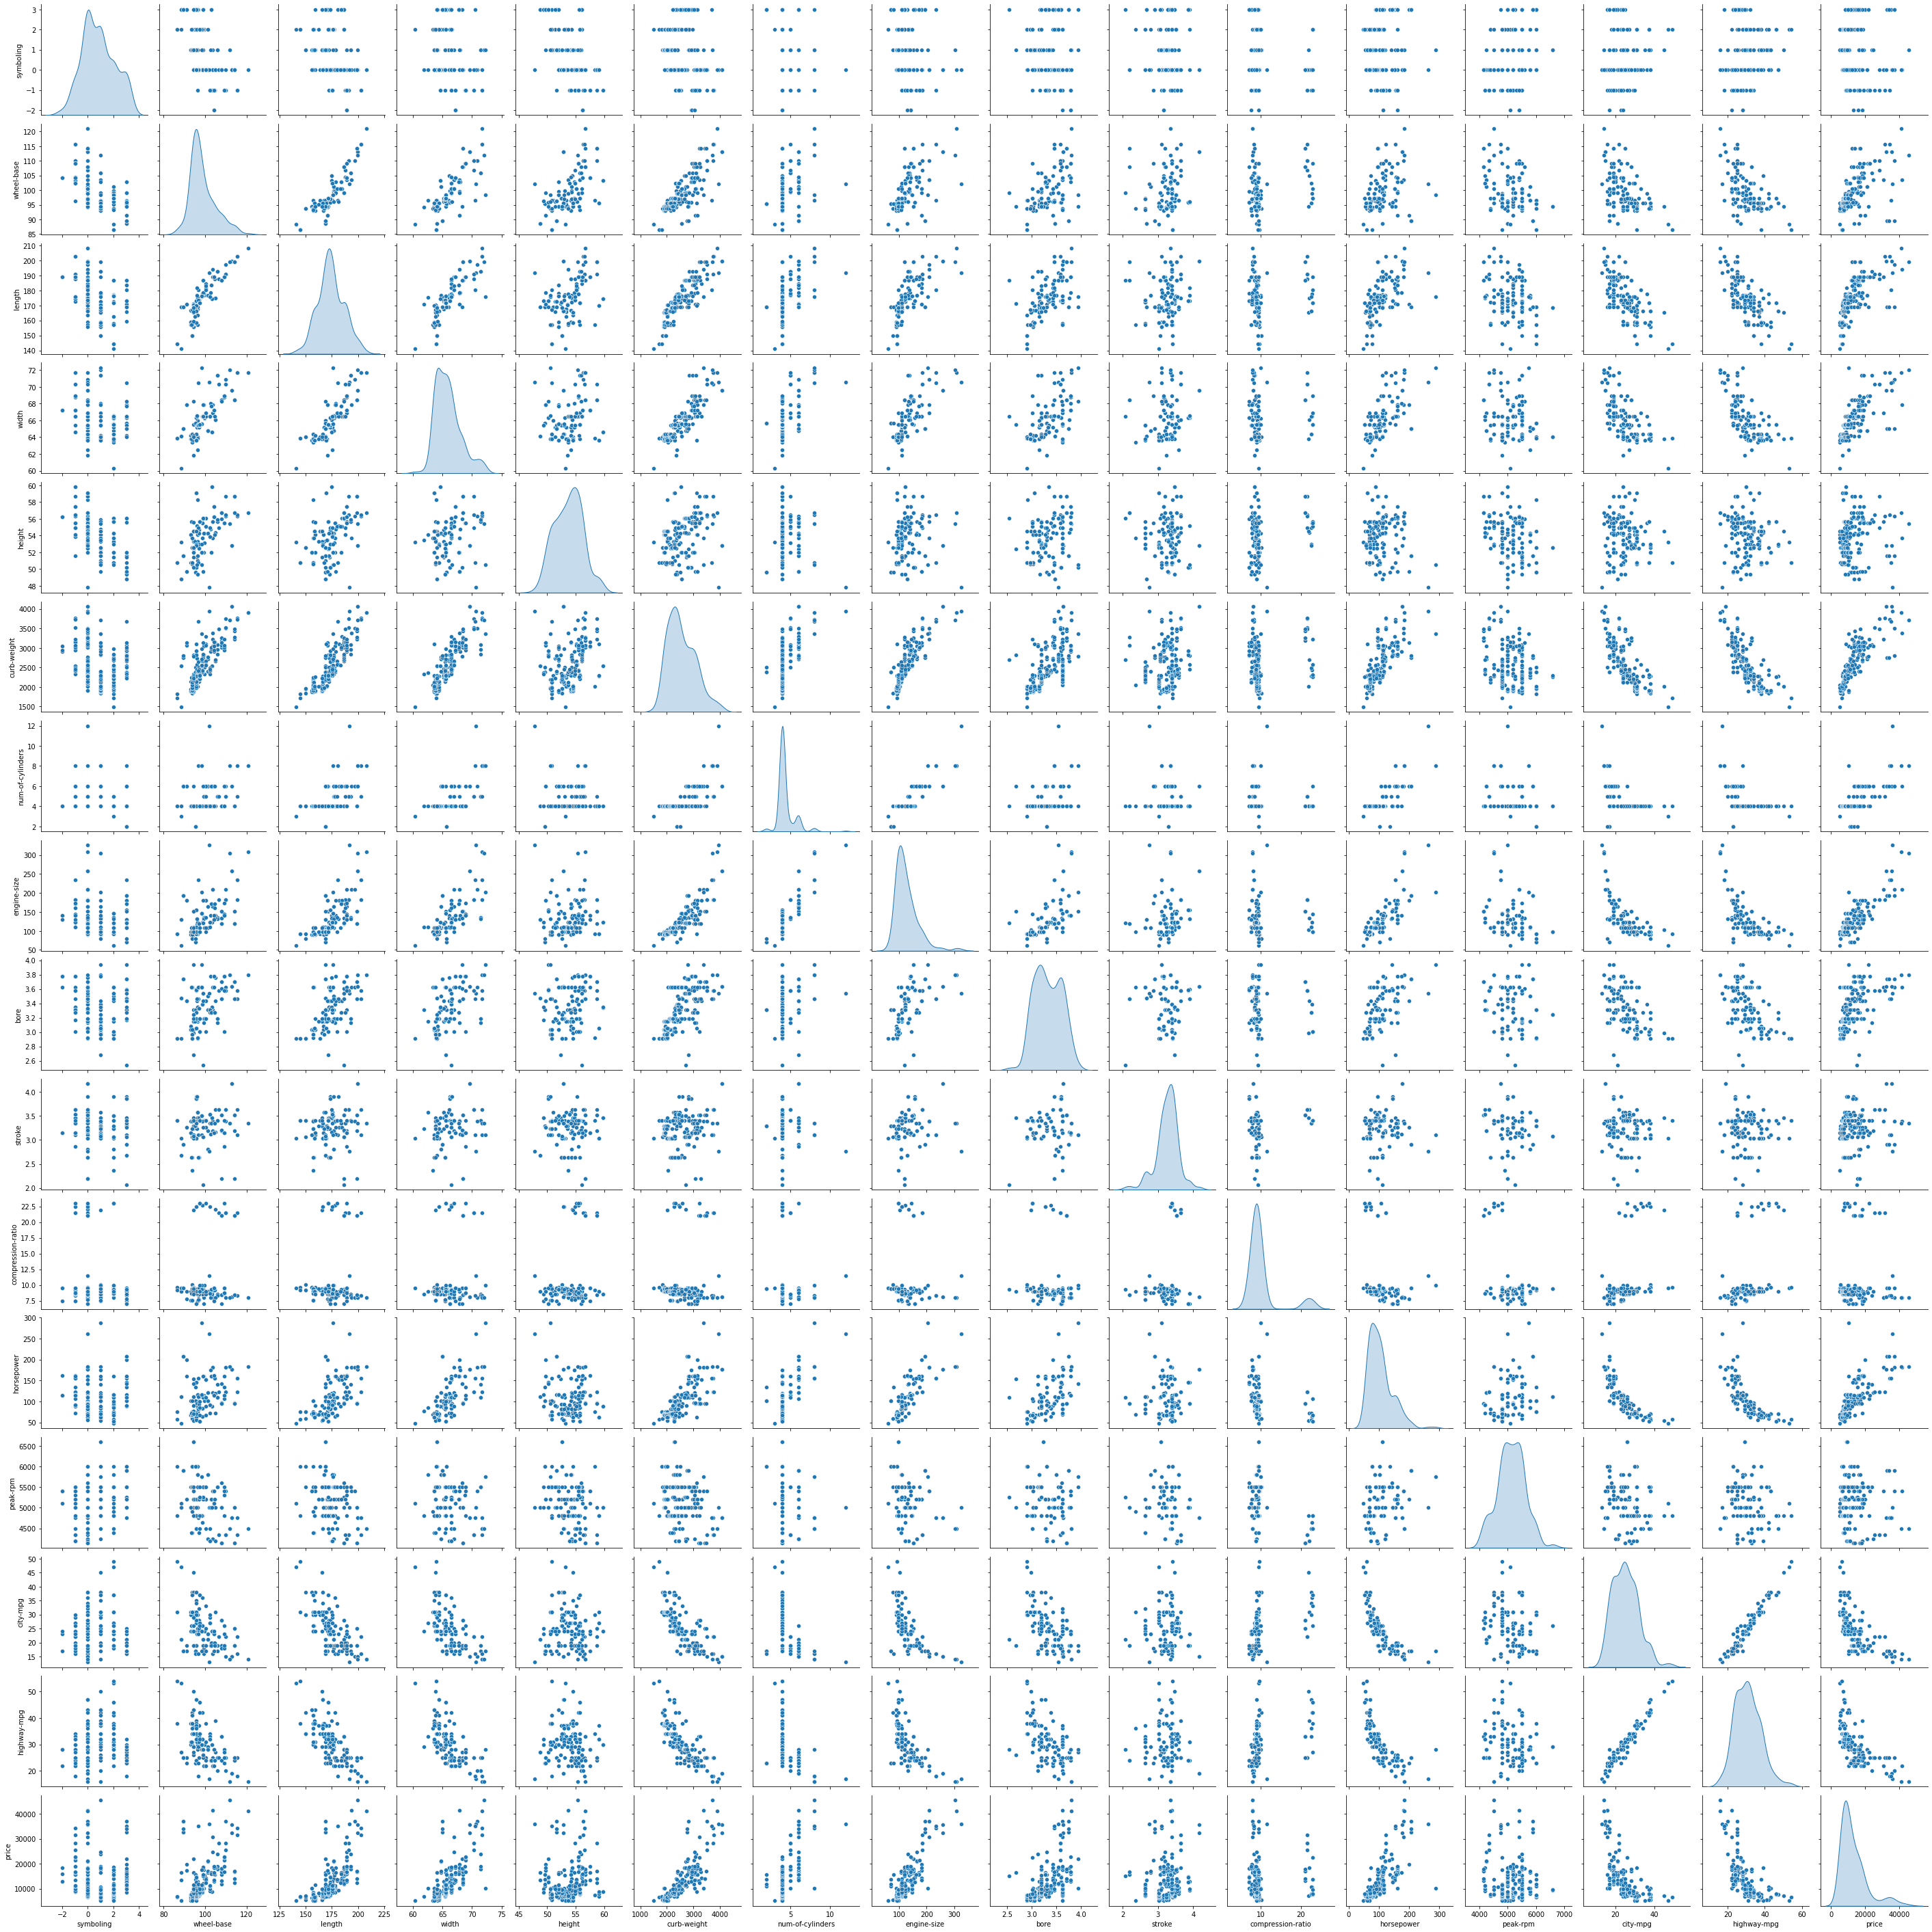

In [ ]:
sns.pairplot(data=df, diag_kind='kde')

### **Model Building**

In [ ]:
X = df.drop('price', axis=1)
X = X.drop('num-of-cylinders', axis=1) # this column can be dropped
y = df[['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(153, 14) (52, 14) (153, 1) (52, 1)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X_test)

### **Performance**

In [ ]:
# print intercept
lr.intercept_[0]

-31719.75728689867

In [ ]:
# Print coefficients of independent variables
for idx, col_name in enumerate(X_train.columns):
  print("The coefficent for {} is {}".format(col_name, lr.coef_[0][idx]))

The coefficent for symboling is 505.0501757982771
The coefficent for wheel-base is 145.35724500077237
The coefficent for length is -64.97881358230336
The coefficent for width is 181.68865470298368
The coefficent for height is 268.1179289861246
The coefficent for curb-weight is 0.6455831156732614
The coefficent for engine-size is 153.00527901926876
The coefficent for bore is -1396.7831272109022
The coefficent for stroke is -2758.6772218327656
The coefficent for compression-ratio is 312.98181130630354
The coefficent for horsepower is -19.695530183614466
The coefficent for peak-rpm is 2.5780262950276267
The coefficent for city-mpg is -264.4785497689721
The coefficent for highway-mpg is -4.104897879934877


In [ ]:
y_test.head(), y_pred[0:5]

(       price
 78    6669.0
 97    7999.0
 151   6338.0
 44   10295.0
 40   10295.0, array([[7748.60705356],
        [6716.91171488],
        [6941.58227864],
        [5378.02985432],
        [9655.81711137]]))

In [ ]:
lr.score(X, y)*100

80.76863270388594

In [ ]:
r2_score(y_test, y_pred)

0.8209158320437646